In [4]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml("mnist_784")

In [6]:
mnist.data.shape

(70000, 784)

In [7]:
mnist.target.shape

(70000,)

In [8]:
print(mnist.target)

['5' '0' '4' ... '4' '5' '6']


In [9]:
print(mnist.data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
print(mnist.data[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [11]:
import matplotlib.pyplot as plt 

%matplotlib inline

In [12]:
import numpy as np 

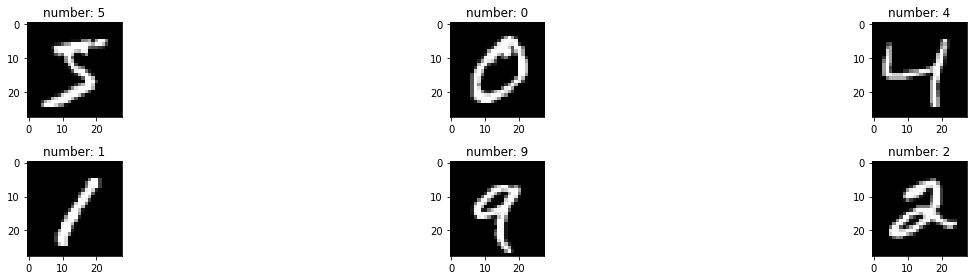

In [13]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(mnist.data[:6], mnist.target[:6])):
    plt.subplot(2,3,index+1)
    plt.tight_layout()
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("number: %s" %label)

In [14]:
from sklearn import metrics

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [18]:
from sklearn import tree

In [25]:
clf=tree.DecisionTreeClassifier(max_depth=50)

In [26]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [27]:
predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

0.8701428571428571


Prediction: 1


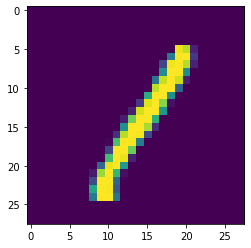

In [28]:
index = 3
plt.imshow(np.reshape(X_test[index], (28,28)))
print("Prediction: " + clf.predict([X_test[index]])[0])

In [29]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[1277,    6,   14,   16,   11,   20,   21,    7,   12,    7],
       [   1, 1534,   15,   13,    3,   12,    3,    8,   10,    2],
       [  20,   18, 1184,   42,   18,   16,   14,   24,   43,   15],
       [  12,   11,   38, 1177,    7,   70,    9,   31,   46,   26],
       [   7,   16,   19,    4, 1192,   12,   15,   11,   29,   85],
       [  17,   12,   11,   43,    8, 1018,   27,   11,   33,   37],
       [  23,    7,   23,    7,   22,   27, 1213,    2,   26,    7],
       [   3,    9,   29,   16,   13,    9,    2, 1303,    8,   43],
       [  12,   20,   45,   41,   24,   34,   23,   18, 1126,   49],
       [  11,    5,   14,   26,   62,   24,    8,   39,   49, 1158]],
      dtype=int64)

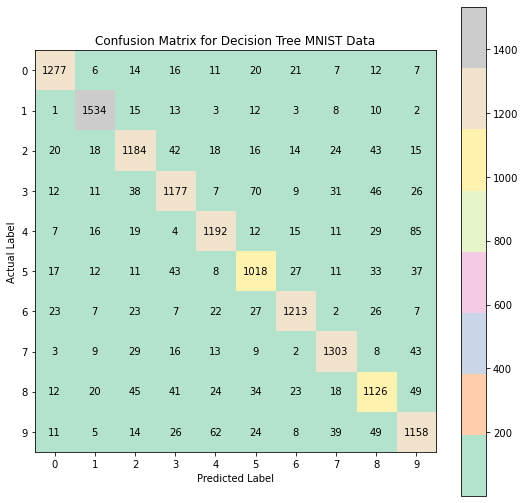

In [32]:
plt.figure(figsize=(9,9))
plt.imshow(cm, cmap='Pastel2')
plt.title('Confusion Matrix for Decision Tree MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center')